In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import pandas as pd
from sklearn.preprocessing import StandardScaler



In [2]:
dataset = pd.read_csv("Salary.csv")
df = dataset.copy()

dataset.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [3]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

In [4]:
y = df["Salary"]
df=df.drop('Salary',axis=1)

label=LabelEncoder()
categorical_cols=df.select_dtypes(include=['object']).columns
# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = label.fit_transform(df[col])




In [14]:
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,Senior
0,32.0,1,1,112,5.0,3,9,0
1,28.0,0,2,24,3.0,4,5,0
2,45.0,1,3,72,15.0,1,9,1
3,36.0,0,1,100,7.0,4,5,0
4,52.0,1,2,34,20.0,4,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   int32  
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   int32  
 4   Years of Experience  6684 non-null   float64
 5   Country              6684 non-null   int32  
 6   Race                 6684 non-null   int32  
 7   Senior               6684 non-null   int64  
dtypes: float64(2), int32(4), int64(2)
memory usage: 313.4 KB


In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.3,random_state=42)



In [7]:

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train[["Age",'Education Level','Job Title',"Years of Experience",'Country','Race']] = scaler.fit_transform(X_train[["Age",'Education Level','Job Title',"Years of Experience",'Country','Race']])

# Transform the test data
X_test[["Age",'Education Level','Job Title',"Years of Experience",'Country','Race']] = scaler.transform(X_test[["Age",'Education Level','Job Title',"Years of Experience",'Country','Race']])


In [8]:
print(scaler.mean_)
print(scaler.scale_)


[33.65733219  1.63039761 72.76036768  8.11276186  2.00406156  4.87302266]
[ 7.6178177   0.87991671 34.00311322  6.037298    1.41896117  3.39801565]


In [9]:
X_train.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,Senior
188,-0.742645,1,-0.716429,0.212911,-1.095318,0.701879,0.920236,0
3802,0.570067,0,0.420042,0.095275,0.312596,-1.412344,-0.845500,0
287,-0.217560,1,-0.716429,0.448183,-0.681226,-0.002862,-0.256921,0
1738,1.620237,1,1.556514,0.536411,0.975145,-0.707603,-0.551211,1
4162,0.307525,0,0.420042,0.095275,0.478233,1.406619,0.037368,0


In [10]:

model =SVR(kernel='rbf',C=2000.,gamma='auto')
model.fit(X_train,y_train)


SVR(C=2000.0, gamma='auto')

In [11]:

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean absolute Error:", mae)


# Calculate R-squared (coefficient of determination)
r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)


print("R-squared train:", r2_train)
print("R-squared test:", r2)


Mean Squared Error: 656630700.8715392
Mean absolute Error: 18740.1469156983
R-squared train: 0.7650738393715122
R-squared test: 0.7518264485203661


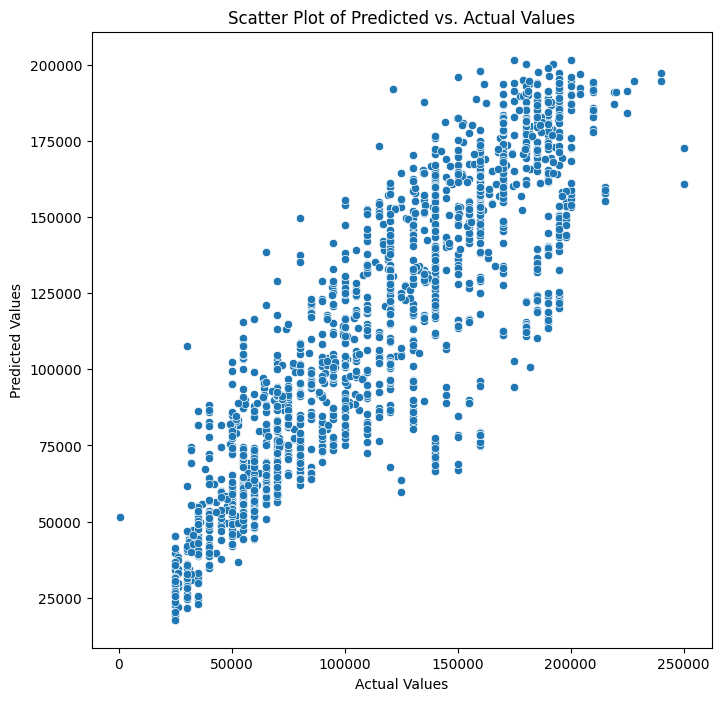

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [13]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'svm_model4.pkl')


['svm_model4.pkl']